# Previous Experiment Workspace
### In our pilot experiments, we probed 0-D, 1-D, and 3-D handle positions inside our workspace.


In [1]:
import pandas as pd
import numpy as np
import pdb

import matplotlib.pyplot as plt




cone_location = '9pt_pidiv3_cone.txt'
cone_3d_positions = pd.read_csv(cone_location)
#pdb.set_trace()
# Iterate over each row, transform into X,Y,Z
x_3, y_3, z_3 = [], [], []
for index, row in cone_3d_positions.iterrows():
    x, y, z = xform_coords_euclidean(row['r'], row['thetay'], row['thetay.1'])
    x_3.append(x)
    y_3.append(y)
    z_3.append(z)

zerod_location = '0mm.txt'
zerod_positions = pd.read_csv(zerod_location)
#pdb.set_trace()
# Iterate over each row, transform into X,Y,Z
x_0, y_0, z_0 = [], [], []
for index, row in zerod_positions.iterrows():
    
    x, y, z = xform_coords_euclidean(row['r'], row['thetay'], row['thetaz'])
    x_0.append(x)
    y_0.append(y)
    z_0.append(z)

fourty_location = '20mm.txt'
fourty_positions = pd.read_csv(fourty_location)
#pdb.set_trace()# Iterate over each row, transform into X,Y,Z
x_40, y_40, z_40 = [], [], []
for index, row in fourty_positions.iterrows():
    #pdb.set_trace()
    x, y, z = xform_coords_euclidean(row['r'], row['thetay'], row['thetaz'])
    x_40.append(x)
    y_40.append(y)
    z_40.append(z)
    fourty_location = '20mm.txt'
twenty_location = '20mm.txt'
twenty_positions = pd.read_csv(twenty_location)
#pdb.set_trace()# Iterate over each row, transform into X,Y,Z
x_20, y_20, z_20 = [], [], []
for index, row in twenty_positions.iterrows():
    #pdb.set_trace()
    x, y, z = xform_coords_euclidean(row['r'], row['thetay'], row['thetaz'])
    x_20.append(x)
    y_20.append(y)
    z_20.append(z)

Note: you may need to restart the kernel to use updated packages.


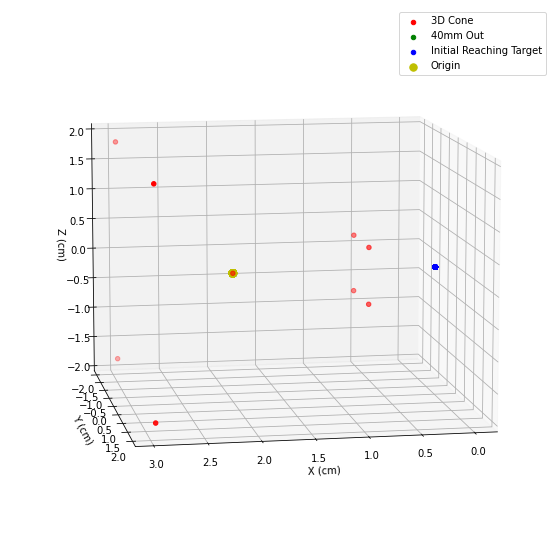

In [2]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d', label='Reaching Volume Projection')
from matplotlib import animation

%pip install ffmpeg
ax.view_init(10,80)

def init():
    ax.scatter( z_3, x_3, y_3, color='r', label = '3D Cone')
    ax.scatter(z_40, x_40, y_40, color='g', label = '40mm Out')
    ax.scatter(z_0, x_0, y_0,  color='b', label = 'Initial Reaching Target')
    ax.scatter(z_20, x_20, y_20,  color='y',s=55, label = 'Origin')
    ax.set_zlabel('Z (cm)')
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    return fig,

def animate(i):
    ax.view_init(elev=15., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
plt.legend()
# Save
#anim.save('C://Users//bassp//Desktop//basic_animation_15.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [3]:
print(z_3, x_3, y_3)




[0.7381444851051177, 0.7381444851051177, 0.7381444851051177, 0.7381444851051177, 2.9525779404204706, 2.9525779404204706, 2.9525779404204706, 2.9525779404204706, 2.0] [0.4979837591237861, 0.4979837591237861, -0.4979837591237861, -0.4979837591237861, 1.9919350364951445, 1.9919350364951445, -1.9919350364951445, -1.9919350364951445, 0.0] [0.45514271910890075, -0.45514271910890075, -0.45514271910890075, 0.45514271910890075, 1.820570876435603, -1.820570876435603, -1.820570876435603, 1.820570876435603, 0.0]


## Manipulate r, theta, phi
## Plot in x, y, z

robot commands
[2.23606798 2.13600094 2.06155281 2.01556444 2.         2.01556444
 2.06155281 2.13600094 2.23606798] [ 0.46364761  0.35877067  0.24497866  0.12435499  0.         -0.12435499
 -0.24497866 -0.35877067 -0.46364761] [1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633]
old position
[2 2 2 2 2 2 2 2 2] [ 1.    0.75  0.5   0.25  0.   -0.25 -0.5  -0.75 -1.  ] [0 0 0 0 0 0 0 0 0]
real_pos
[0.22351545 0.21351564 0.20607593 0.20148023 0.19992484 0.20148023
 0.20607593 0.21351564 0.22351545] [ 0.00180877  0.00133699  0.00088112  0.00043729  0.         -0.00043729
 -0.00088112 -0.00133699 -0.00180877] [0.00612954 0.00585523 0.00565116 0.00552509 0.00548243 0.00552509
 0.00565116 0.00585523 0.00612954]


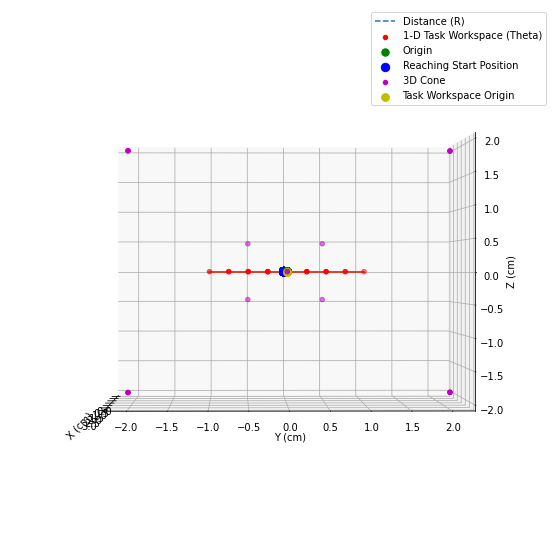

In [8]:
import random
# R is reach distance, create function that modulates theta while keeping r constant
# Choose focus to be "10"

# For R3 experiments, choose focus to be 0, 10, 20
def circle_variablerad_xdim(y, r):
    """ Function to create hyperbola line, focus at 10cm in reaching space. Given a set of x-coordinates, generate y
        for a given radius r. Phi (elevation) is given as 90 degrees or pi/4, allowing points to be level in the plane. """
    x = np.sqrt(r**2 - y**2)
    return x



def xform_coords_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2) # path length
    phi = np.arccos(z/r) # degrees
    theta = np.arctan(y/x) # degrees
    return r, theta, phi



y_sample_pos_half = np.asarray([1.0/2, 0.75/2, 0.5/2, 0.25/2, 0, -0.25/2, -0.5/2, -0.75/2, -1.0/2]) # Length to sample
y_sample_pos = np.asarray([1,0.75,0.5,0.25,0,-0.25,-0.5,-0.75,-1])
r_theta = np.asarray([2,2,2,2,2,2,2,2,2])

z_sample_pos = np.asarray([0,0,0,0,0,0,0,0,0])
x_sample_pos = circle_variablerad_xdim(y_sample_pos, r_theta)
x_sample_pos =  x_sample_pos



theta_x = [1]
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(1, 1, 1, projection='3d', label='Reaching Volume Projection: New Experiments')
    
    
def new_experiments_animation():
    """ Function to animate a plot of proposed experiments in 1, 2 and 3-D task space planes."""
    ax1.plot([2,0],[0,0],[0,0], linestyle='--', label='Distance (R)')
    ax1.plot(x_sample_pos,y_sample_pos, z_sample_pos,)
    ax1.scatter(x_sample_pos,y_sample_pos, z_sample_pos, color='r', label = '1-D Task Workspace (Theta)')
    ax1.scatter(z_20, x_20, y_20,  color='g',s=55, label = 'Origin')
    ax1.scatter(x_0, y_0, z_0, color='b', s=70, label='Reaching Start Position')
    #ax1.scatter(origin_vector,y_dimension_positions, zero_vector, color='g', label = '1-D Task Workspace (Y)')
    #ax1.scatter(origin_vector, zero_vector,z_dimension_positions, color='b', label = '1-D Task Workspace (Z)')
    ax1.scatter( z_3, x_3, y_3, color='m', label = '3D Cone')
    ax1.scatter(2,0,0,color='y',s=60,label='Task Workspace Origin')
    ax1.set_zlabel('Z (cm)')
    ax1.set_xlabel('X (cm)')
    ax1.set_ylabel('Y (cm)')
    return fig1, 


def animate_1(i):
    ax1.view_init(elev=0, azim=i)
    return fig1,


anim = animation.FuncAnimation(fig1, animate_1, init_func=new_experiments_animation,
                               frames=360, interval=20, blit=True)
plt.legend()
anim.save('theta_1d.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

r_theta1d, theta_theta1d, phi_theta1d = xform_coords_spherical(r_theta,y_sample_pos,z_sample_pos) 
import csv
theta_dict = {"r":r_theta1d,"thetay":theta_theta1d,"thetaz":phi_theta1d}
tdf = pd.DataFrame(theta_dict)
tdf.to_csv('theta1d_commands.csv')
#with open('theta1d_commands.csv', 'w') as f:  # You will need 'wb' mode in Python 2.x
#    w = csv.DictWriter(f, theta_dict.keys())
#    w.writeheader()
#    w.writerow(theta_dict)
xt,yt,zt = xform_coords_euclidean(r_theta1d,theta_theta1d,phi_theta1d)
print('robot commands')
print(r_theta1d, theta_theta1d, phi_theta1d)
print('old position')
print(r_theta,y_sample_pos,z_sample_pos)
print('real_pos')
print( xt,yt,zt)

<IPython.core.display.Javascript object>


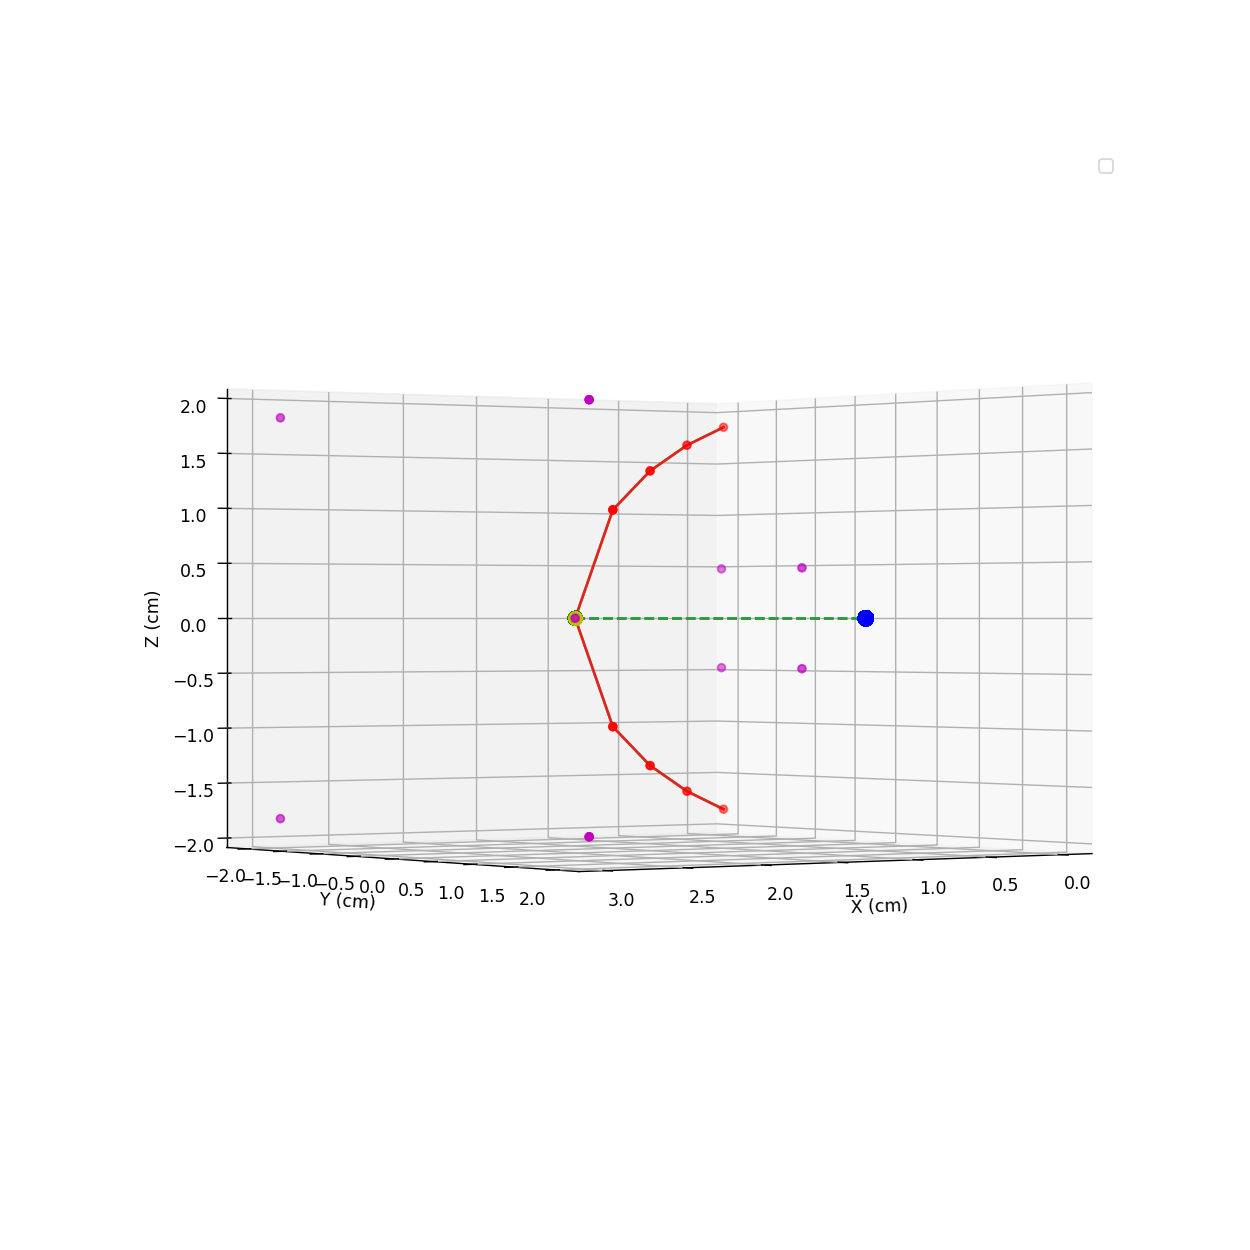

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[2.64575131 2.53722289 2.39791576 2.2220486  2.         2.2220486
 2.39791576 2.53722289 2.64575131] [0. 0. 0. 0. 0. 0. 0. 0. 0.] [2.28452071 2.23361093 2.15517022 2.02166178 1.57079633 1.11993087
 0.98642243 0.90798172 0.85707195]


In [32]:
# Given 
#x_sample_pos_phi = np.asarray([1.0/2, 1.25/2, 1.5/2, 1.75/2, 2.0/2, 1.75/2, 1.5/2, 1.25/2, 1.0/2]) # Length to sample
x_sample_pos_phi = np.asarray([1,1.25,1.5,1.75,2,1.75,1.5,1.25,1])
r_phi = np.asarray([2,2,2,2,2,2,2,2,2])

y_sample_pos_phi = np.asarray([0,0,0,0,0,0,0,0,0])
z_sample_pos_phi = circle_variablerad_xdim(x_sample_pos_phi, r_phi)
z_sample_pos_phi[0:4] = -1 * z_sample_pos_phi[0:4]
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(1, 1, 1, projection='3d', label='Reaching Volume Projection: New Experiments')  

def new_experiments_animation():
    """ Function to animate a plot of proposed experiments in 1, 2 and 3-D task space planes."""
    ax1.plot([2,0],[0,0],[0,0], linestyle='--', label='Distance (R)')
    ax1.plot(x_sample_pos_phi,y_sample_pos_phi, z_sample_pos_phi)
    ax1.scatter(x_sample_pos_phi,y_sample_pos_phi, z_sample_pos_phi, color='r', label = '1-D Task Workspace (Phi)')
    ax1.scatter(z_20, x_20, y_20,  color='g',s=55, label = 'Origin')
    ax1.scatter(x_0, y_0, z_0, color='b', s=70, label='Reaching Start Position')
    #ax1.scatter(origin_vector,y_dimension_positions, zero_vector, color='g', label = '1-D Task Workspace (Y)')
    #ax1.scatter(origin_vector, zero_vector,z_dimension_positions, color='b', label = '1-D Task Workspace (Z)')
    ax1.scatter( z_3, x_3, y_3, color='m', label = '3D Cone')
    ax1.scatter(2,0,0,color='y',s=60,label='Task Workspace Origin')
    ax1.set_zlabel('Z (cm)')
    ax1.set_xlabel('X (cm)')
    ax1.set_ylabel('Y (cm)')
    return fig1, 


def animate_1(i):
    ax1.view_init(elev=0, azim=i)
    return fig1,


anim = animation.FuncAnimation(fig1, animate_1, init_func=new_experiments_animation,
                               frames=360, interval=20, blit=True)
plt.legend()
r_phi1d, theta_phi1d, phi_phi1d = xform_coords_spherical(r_phi,y_sample_pos_phi,z_sample_pos_phi) 
print(r_phi1d, theta_phi1d, phi_phi1d)
import csv
phi_dict = {"r":r_phi1d,"thetay":theta_phi1d,"thetaz":phi_phi1d}
pdf = pd.DataFrame(phi_dict)
pdf.to_csv('phi1d_commands.csv')
anim.save('phi_1d.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

# 2-D Task Space: Theta and Phi

## Sub-sample the two planes in a sensible way. Two types of samples (get both points)

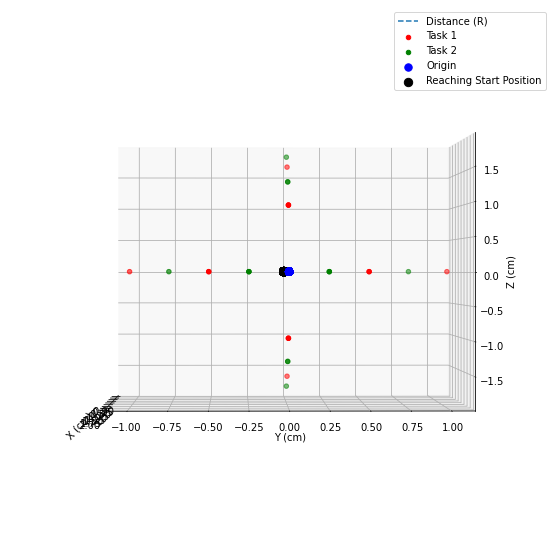

In [23]:
r_2d_1 = np.hstack([r_theta1d[0], r_phi1d[1], r_theta1d[2], r_phi1d[3], r_theta1d[4], r_phi1d[5], r_theta1d[6], r_phi1d[7],
                    r_theta1d[8]])
r_2d_2 = np.hstack([ r_phi1d[0], r_theta1d[1], r_phi1d[2], r_theta1d[3], r_phi1d[4], r_theta1d[5], r_phi1d[6], r_theta1d[7],
                   r_phi1d[8]])

theta_2d_1 = np.hstack([theta_theta1d[0], theta_phi1d[1], theta_theta1d[2], theta_phi1d[3], theta_theta1d[4], theta_phi1d[5], theta_theta1d[6], theta_phi1d[7],
                    theta_theta1d[8]])
theta_2d_2 = np.hstack([ theta_phi1d[0], theta_theta1d[1], theta_phi1d[2], theta_theta1d[3], theta_phi1d[4], theta_theta1d[5], theta_phi1d[6], r_theta1d[7],
                   theta_phi1d[8]])

phi_2d_1 = np.hstack([phi_theta1d[0], phi_phi1d[1], phi_theta1d[2], phi_phi1d[3], phi_theta1d[4], phi_phi1d[5], phi_theta1d[6], phi_phi1d[7],
                    phi_theta1d[8]])
phi_2d_2 = np.hstack([ phi_phi1d[0], phi_theta1d[1], phi_phi1d[2], phi_theta1d[3], phi_phi1d[4], phi_theta1d[5], phi_phi1d[6], phi_theta1d[7],
                   phi_phi1d[8]])

dict_2d_1 = {"r":r_2d_1, "thetay":theta_2d_1, "thetaz":phi_2d_1}

df_2d_1 = pd.DataFrame(dict_2d_1)

dict_2d_2 = {"r": r_2d_2, "thetay":theta_2d_2, "thetaz":phi_2d_2}
df_2d_2 = pd.DataFrame(dict_2d_2)

df_2d_1.to_csv('2d_commands_1.csv')
df_2d_2.to_csv('2d_commands_2.csv')

fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(1, 1, 1, projection='3d', label='Reaching Volume Projection: New Experiments 2-D')  

def new_experiments_animation():
    """ Function to animate a plot of proposed experiments in 1, 2 and 3-D task space planes."""
    ax1.plot([2,0],[0,0],[0,0], linestyle='--', label='Distance (R)')
    #ax1.plot(x_sample_pos_phi,y_sample_pos_phi, z_sample_pos_phi)
    #ax1.scatter(x_sample_pos_phi,y_sample_pos_phi, z_sample_pos_phi, color='r', label = '1-D Task Workspace (Phi)')
    ax1.scatter(x_sample_pos_phi[::2],y_sample_pos_phi[::2], z_sample_pos_phi[::2], color='g')
    ax1.scatter(x_sample_pos_phi[1::2],y_sample_pos_phi[1::2], z_sample_pos_phi[1::2], color='r')
    ax1.scatter(x_sample_pos[::2],y_sample_pos[::2], z_sample_pos[::2],color='r', label='Task 1')
    ax1.scatter(x_sample_pos[1::2],y_sample_pos[1::2], z_sample_pos[1::2],color='g', label='Task 2')
    #ax1.scatter(x_sample_pos,y_sample_pos, z_sample_pos, color='r', label = '1-D Task Workspace (Theta)')
    #ax1.plot(x_sample_pos,y_sample_pos, z_sample_pos, color='r')
    
    ax1.scatter(z_20, x_20, y_20,  color='b',s=55, label = 'Origin')
    ax1.scatter(x_0, y_0, z_0, color='k', s=70, label='Reaching Start Position')
    #ax1.scatter(origin_vector,y_dimension_positions, zero_vector, color='g', label = '1-D Task Workspace (Y)')
    #ax1.scatter(origin_vector, zero_vector,z_dimension_positions, color='b', label = '1-D Task Workspace (Z)')
    #ax1.scatter( z_3, x_3, y_3, color='m', label = '3D Cone')
    #ax1.scatter(2,0,0,color='y',s=60,label='Task Workspace Origin')
    ax1.set_zlabel('Z (cm)')
    ax1.set_xlabel('X (cm)')
    ax1.set_ylabel('Y (cm)')
    return fig1, 


def animate_1(i):
    ax1.view_init(elev=0, azim=i)
    return fig1,


anim = animation.FuncAnimation(fig1, animate_1, init_func=new_experiments_animation,
                               frames=360, interval=20, blit=True)
plt.legend()

dict_2d_commands_1 = {"r":r_2d_1}
anim.save('phi_theta_1d.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

# 3-D Task Space: Vary R, Theta, and Phi

## We now want to vary all 3 spatial task dimensions. To do this, we systemically change the distance required to reach by creating targets with similar shape but different r values.

<IPython.core.display.Javascript object>


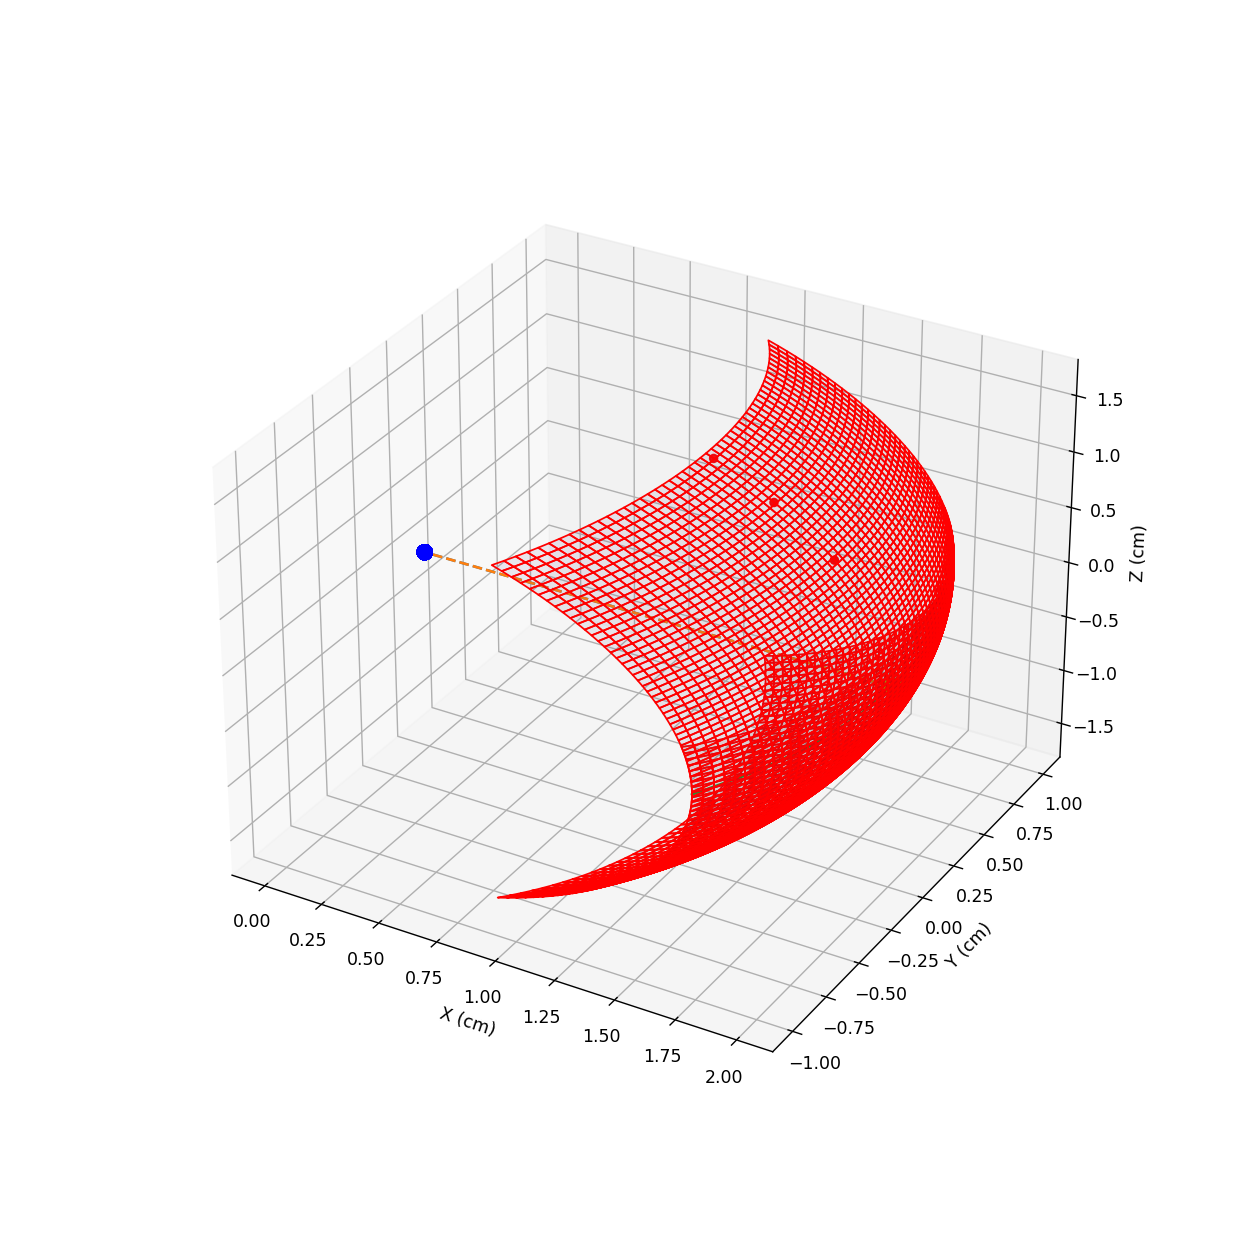

In [24]:
def task_sphere_surface(r,x,y):
    z = np.sqrt((r**2)-(x**2)-(y**2))
    return z
%matplotlib notebook
x_pos_shell = np.linspace(-1,1,1000)
y_pos_shell = np.linspace(-1,1,1000)

xs, ys = np.meshgrid(y_pos_shell,x_pos_shell) # Shape LxL ea
z_pos_shell= np.zeros((1000,1000))
# evaluate zs at each point
for i in range(0,y_pos_shell.shape[0]):
    for j in range(0,y_pos_shell.shape[0]):
        z_pos_shell[i,j] = task_sphere_surface(2,xs[i,j],ys[i,j])
         
under_pos_shell = -1 *z_pos_shell      

#z_pos_shell = np.asarray(z_shell_array).reshape(1000,1000)
#z_pos_shell = task_sphere_surface(2,x_pos_shell,y_pos_shell)
xp = xs # center coordinates at 
yp=ys
zp=z_pos_shell
zpn = under_pos_shell
# Flip on y-axis
theta = np.pi/8+np.pi/2
xp = xs*np.cos(theta) + z_pos_shell*np.sin(theta)
yp=ys
zp=z_pos_shell*np.cos(theta) - xs*np.sin(theta)

theta_under= -np.pi/8+np.pi/2

xpn = xs*np.cos(theta_under) + z_pos_shell*np.sin(theta_under)
ypn=ys
zpn = z_pos_shell*np.cos(theta_under) - xs*np.sin(theta_under)
# Rotate by 90 degrees on z axis
#delta =  - np.pi/2 
# Below are transformations for x,y planes
#xp=x
#yp=y*np.cos(delta)-z*np.sin(delta)
#zp=z*np.cos(delta)+y*np.sin(delta)

#x=x*np.cos(delta)+z*np.sin(delta)
#z=z*np.cos(delta)-x*np.sin(delta)
#phi = np.pi/4
#xp = x*np.cos(phi)-y*np.sin(phi)
#yp=x*np.sin(phi)+y*np.cos(phi)
#zp=z


fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(1, 1, 1, projection='3d', label='Reaching Volume Projection: New Experiments')  

ax1.plot([2,0],[0,0],[0,0], linestyle='--', label='Distance (R)')
#ax1.plot(x_sample_pos_phi,y_sample_pos_phi, z_sample_pos_phi)
ax1.plot([2,0],[0,0],[0,0], linestyle='--', label='Distance (R)')
ax1.plot(x_sample_pos,y_sample_pos, z_sample_pos,)
ax1.scatter(x_sample_pos_phi[1:-1],y_sample_pos_phi[1:-1], z_sample_pos_phi[1:-1], color='r', label = '1-D Task Workspace (Phi)')
ax1.scatter(z_20, x_20, y_20,  color='y',s=100, label = 'Origin')
ax1.scatter(x_0, y_0, z_0, color='b', s=70, label='Reaching Start Position')
ax1.plot_surface(xp,yp,zp,alpha=0.1,edgecolors='r')
ax1.plot_surface(xpn,ypn,zpn,alpha=0.1,edgecolors='r')

ax1.plot_surface(xp+,yp,zp,alpha=0.1,edgecolors='r')
ax1.plot_surface(xpn,ypn,zpn,alpha=0.1,edgecolors='r')

ax1.plot_surface(xp,yp,zp,alpha=0.1,edgecolors='r')
ax1.plot_surface(xpn,ypn,zpn,alpha=0.1,edgecolors='r')

ax1.set_zlabel('Z (cm)')
ax1.set_xlabel('X (cm)')
ax1.set_ylabel('Y (cm)')
plt.savefig('2d_surface_task.png')

# Sample X number of points from manifold that each rat reaches to at least twice

# Plan on doing 2-4 rats for these
# Blocks of varying # of target positions (complexity ~ task positions)
# Vary blocks in 5, 17, 25, 33 positions

# X = 100 200 successful reaches total for surface

# X3 = 300 (600 successful total reaches for surface)

# Sample positions: From surface, take N samples, sample randomly during task

<IPython.core.display.Javascript object>


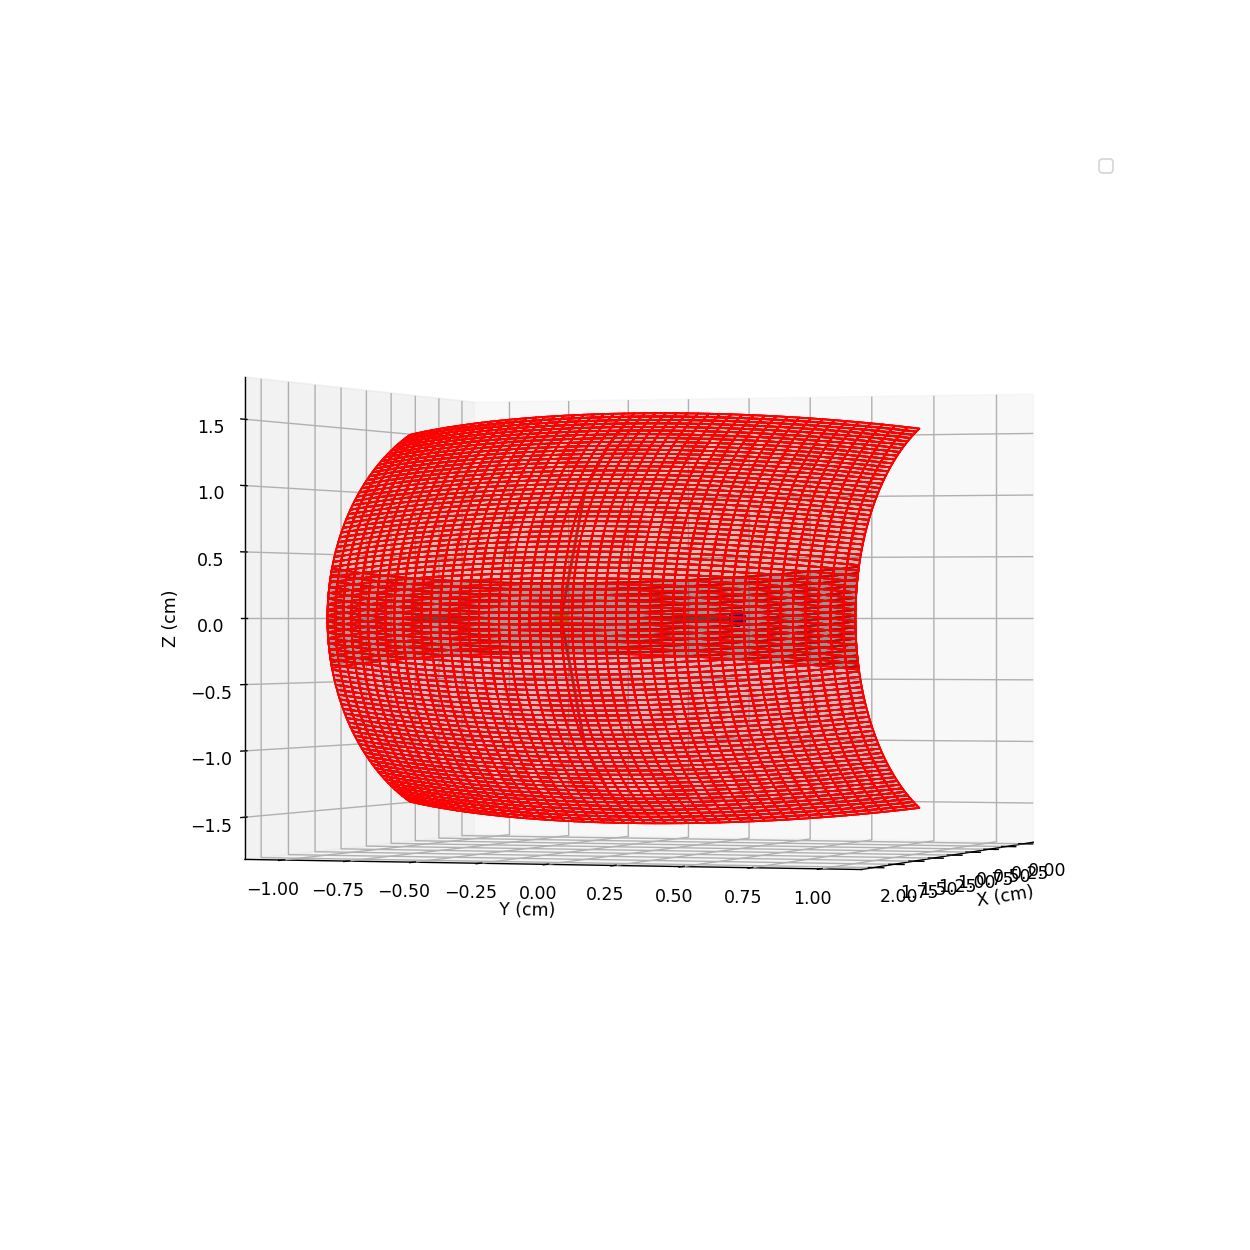

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [31]:

#surface_sample_positions = np.random.choice()

fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(1, 1, 1, projection='3d', label='Reaching Volume Projection: New Experiments')  

def new_experiments_animation():
    """ Function to animate a plot of proposed experiments in 1, 2 and 3-D task space planes."""
    ax1.plot([2,0],[0,0],[0,0], linestyle='--', label='Distance (R)')
    ax1.plot(x_sample_pos_phi[1:8],y_sample_pos_phi[1:8], z_sample_pos_phi[1:8])
    ax1.plot([2,0],[0,0],[0,0], linestyle='--', label='Distance (R)')
    ax1.plot(x_sample_pos[1:8],y_sample_pos[1:8], z_sample_pos[1:8])
    #ax1.scatter(x_sample_pos_phi[1:8],y_sample_pos_phi[1:8], z_sample_pos_phi[1:8], color='r', label = '1-D Task Workspace (Phi)')
    ax1.scatter(z_20, x_20, y_20,  color='y',s=55, label = 'Origin')
    ax1.scatter(x_0, y_0, z_0, color='b', s=70, label='Reaching Start Position')
    ax1.plot_surface(xp,yp,zp,alpha=0.1,edgecolors='r')
    ax1.plot_surface(xpn,ypn,zpn,alpha=0.1,edgecolors='r')
    #ax1.plot_surface(xp+0.5,yp,zp,alpha=0.1,edgecolors='g')
    #ax1.plot_surface(xpn+0.5,ypn,zpn,alpha=0.1,edgecolors='g')
    #ax1.plot_surface(xp-0.5,yp,zp,alpha=0.1,edgecolors='k')
    #ax1.plot_surface(xpn-0.5,ypn,zpn,alpha=0.1,edgecolors='k')
    ax1.set_zlabel('Z (cm)')
    ax1.set_xlabel('X (cm)')
    ax1.set_ylabel('Y (cm)')
    return fig1, 

anim = animation.FuncAnimation(fig1, animate_1, init_func=new_experiments_animation,
                               frames=360, interval=20, blit=True)
plt.legend()

anim.save('2d_task_surface.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

In [ ]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(1, 1, 1, projection='3d', label='Reaching Volume Projection: New Experiments')

x_dimension_positions = [0.4,0.8,1.2,1.6,2.0,2.4,2.8,3.2,3.6]
y_dimension_positions = [-1.6,-1.2,-0.8, -0.4, 0.0, 0.4, 0.8, 1.2, 1.6]
z_dimension_positions = y_dimension_positions
origin_vector = [2,2,2,2,2,2,2,2,2]
zero_vector = np.zeros(9)



def new_experiments_animation():
    """ Function to animate a plot of proposed experiments in 1, 2 and 3-D task space planes."""
    ax1.scatter(x_dimension_positions,zero_vector, zero_vector, color='r', label = '1-D Task Workspace (X)')
    ax1.scatter(origin_vector,y_dimension_positions, zero_vector, color='g', label = '1-D Task Workspace (Y)')
    ax1.scatter(origin_vector, zero_vector,z_dimension_positions, color='b', label = '1-D Task Workspace (Z)')
    ax1.scatter( z_3, x_3, y_3, color='m', label = '3D Cone')
    ax1.scatter(2,0,0,color='y',s=60,label='Task Workspace Origin')
    ax1.set_zlabel('Z (cm)')
    ax1.set_xlabel('X (cm)')
    ax1.set_ylabel('Y (cm)')
    return fig1, 


def animate_1(i):
    ax1.view_init(elev=15., azim=i)
    return fig1,


anim = animation.FuncAnimation(fig1, animate_1, init_func=new_experiments_animation,
                               frames=360, interval=20, blit=True)
plt.legend()
anim.save('C://Users//bassp//Desktop//updated_1d_experiments_animation_15.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

In [ ]:

fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(1, 1, 1, projection='3d', label='Reaching Volume Projection: 2-D Plane Locations')

two_d_x_xy_positions = [0.4, 0.4, 0.4, 2, 2, 2, 3.6, 3.6, 3.6]
two_d_y_xy_positions = [0, -1.6, 1.6, 0, -1.6, 1.6, 0, -1.6, 1.6]
two_d_z_positions = [0, -1.6, 1.6, 0, -1.6, 1.6, 0, -1.6, 1.6]


def new_experiments_animation_planes():
    """ Function to animate a plot of proposed experiments in 1, 2 and 3-D task space planes."""
    ax2.scatter(two_d_x_xy_positions,two_d_y_xy_positions, zero_vector, color='r', label = '2-D Task Workspace (X-Y)')
    #ax2.scatter(origin_vector,two_d_y_xy_positions,two_d_z_positions, color='g', label = '1-D Task Workspace (Y-Z)')
    #ax2.scatter(two_d_x_xy_positions, zero_vector,two_d_z_positions, color='b', label = '2-D Task Workspace (X-Z)')
    ax2.scatter( z_3, x_3, y_3, color='m', label = '3D Cone')
    ax2.scatter(2,0,0,color='y',s=60,label='Task Workspace Origin')
    ax2.set_zlabel('Z (cm)')
    ax2.set_xlabel('X (cm)')
    ax2.set_ylabel('Y (cm)')
    return fig2, 


def animate_2(i):
    ax2.view_init(elev=15., azim=i)
    return fig2,


anim = animation.FuncAnimation(fig2, animate_2, init_func=new_experiments_animation_planes,
                               frames=360, interval=20, blit=True)
plt.legend()
anim.save('C://Users//bassp//Desktop//updated_2d_experiments_animation_15_xy.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

In [ ]:
fig3 = plt.figure(figsize=(10, 10))
ax3 = fig3.add_subplot(1, 1, 1, projection='3d', label='Reaching Volume Projection: 3-D Cube')

X_pos_cube = [2, 0.4, 0.4, 0.4, 0.4, 3.6, 3.6, 3.6, 3.6 ]
Y_pos_cube = [0, 1.6, 1.6, -1.6, -1.6, 1.6, 1.6, -1.6, -1.6]
Z_pos_cube = [0, 1.6, -1.6, 1.6, -1.6, 1.6, -1.6, 1.6, -1.6]

def new_experiments_animation_cube():
    ax3.scatter(X_pos_cube,Y_pos_cube, Z_pos_cube, color='r', label = '3-D Task Workspace (X-Y-Z)')
    #ax2.scatter(origin_vector,two_d_y_xy_positions,two_d_z_positions, color='g', label = '1-D Task Workspace (Y-Z)')
    #ax2.scatter(two_d_x_xy_positions, zero_vector,two_d_z_positions, color='b', label = '2-D Task Workspace (X-Z)')
    ax3.scatter( z_3, x_3, y_3, color='m', label = '3D Cone')
    ax3.scatter(2,0,0,color='y',s=60,label='Task Workspace Origin')
    ax3.set_zlabel('Z (cm)')
    ax3.set_xlabel('X (cm)')
    ax3.set_ylabel('Y (cm)')
    return fig3, 

def animate_3(i):
    ax3.view_init(elev=15., azim=i)
    return fig3,


anim = animation.FuncAnimation(fig3, animate_3, init_func=new_experiments_animation_cube,
                               frames=360, interval=20, blit=True)
plt.legend()
anim.save('C://Users//bassp//Desktop//3-D_cube_taskspace.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

In [ ]:
def xform_coords_spherical(x, y, z):
    x=x*10
    y=y*10
    z=z*10
    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    theta = np.arccos(z / r)
    if x > 0:
        phi = np.arctan(y/x)
    elif x < 0:
        phi = np.arctan(y/x) + np.pi
    elif x == 0:
        if y > 0:
            phi = np.pi/2
        if y < 0:
            phi = (-1 * np.pi) / 2
    else:
        phi = 0
    return r, theta, phi

def get_spherical_experiment_coords_from_euclidean(x_array, y_array, z_array):
    spherical_coords_array = np.zeros((3, len(x_array)))
    for i in range(0, len(x_array)):
        r, theta, phi = xform_coords_spherical(x_array[i], y_array[i], z_array[i])
        spherical_coords_array[:,i] = [r, theta, phi]
    return spherical_coords_array

x_1d_spherical = get_spherical_experiment_coords_from_euclidean(x_dimension_positions,zero_vector,zero_vector)
y_1d_spherical = get_spherical_experiment_coords_from_euclidean(origin_vector,y_dimension_positions, zero_vector)
z_1d_spherical = get_spherical_experiment_coords_from_euclidean(origin_vector, zero_vector,z_dimension_positions)

xy_2d_spherical = get_spherical_experiment_coords_from_euclidean(two_d_x_xy_positions,two_d_y_xy_positions, zero_vector)
xz_2d_spherical = get_spherical_experiment_coords_from_euclidean(two_d_x_xy_positions, zero_vector,two_d_z_positions)
yz_2d_spherical = get_spherical_experiment_coords_from_euclidean(origin_vector,two_d_y_xy_positions,two_d_z_positions)

xyz_3d_spherical = get_spherical_experiment_coords_from_euclidean(X_pos_cube,Y_pos_cube, Z_pos_cube)



In [ ]:
z_1d_spherical